# Behaviors of degrees of freedom

To define the motion of a joint requires that we define the behavior
of each of the joint's degrees of freedom. There are three different types of
behavior of a degree of freedom:
(1) Its motion is prescribed with a given function of time, in which case we say that the
    degree of freedom is *constrained*
(2) Its motion is specified directly, but determined by a process that lies outside
    of the body system, in which case we say the degree of freedom is *exogenous*.
(3) Its motion is determined indirectly by some sort of force model for its behavior,
    such as a spring or damper, in which case we say the degree of freedom is *unconstrained*.

Here, we will discuss how to set a degree of freedom with one of these behaviors,
and how to set the prescribed motion, if desired.

In [1]:
using RigidBodyTools
using Plots

## Constrained behavior (i.e., prescribed motion)
When a degree of freedom is constrained, then its behavior over time
is set by some time-varying function. There are a number of different
types of predefined time-varying behaviors.
### Constant velocity
To specify constant velocity with some velocity, e.g. $U=1$, set

In [2]:
U = 1.0
k = ConstantVelocityDOF(U)

Constant velocity kinematics (velocity = 1.0)

For any prescribed motion, we can evaluate it at any specified time.
It returns data of type `DOFKinematicData`.

In [3]:
t = 1.0
kt = k(t)

DOFKinematicData(1.0, 1.0, 1.0, 0.0)

The kinematic data can be parsed with
`dof_position`, `dof_velocity`, and `dof_acceleration`:

In [4]:
dof_position(kt)

1.0

In [5]:
dof_velocity(kt)

1.0

In [6]:
dof_acceleration(kt)

0.0

Let's plot the position over time

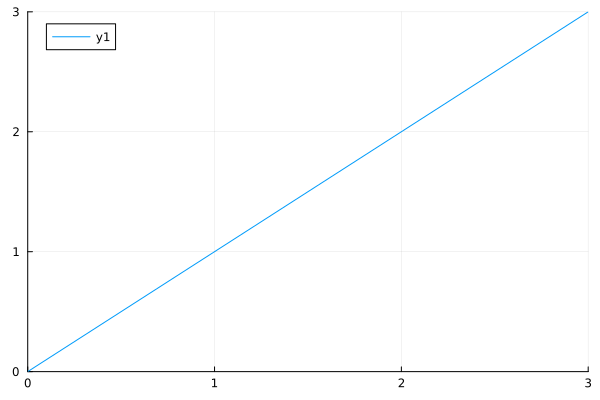

In [7]:
t = range(0,3,length=301)
plot(t,dof_position.(k.(t)),xlims=(0,Inf),ylims=(0,Inf))

### Oscillatory motion
We can set the position to be a sinusoidal function. For this, we
set the amplitude, the angular frequency, the phase, and the mean velocity (typically zero).

In [8]:
A = 1.0 ## amplitude
Ω = 2π ## angular frequency
ϕ = π/2 ## phase
vel = 0  ## mean velocity
k = OscillatoryDOF(A,Ω,ϕ,vel)

Oscillatory kinematics (amplitude = 1.0, ang freq = 6.283185307179586, phase = 1.5707963267948966, mean velocity = 0.0)

Plot the position, velocity, and acceleration

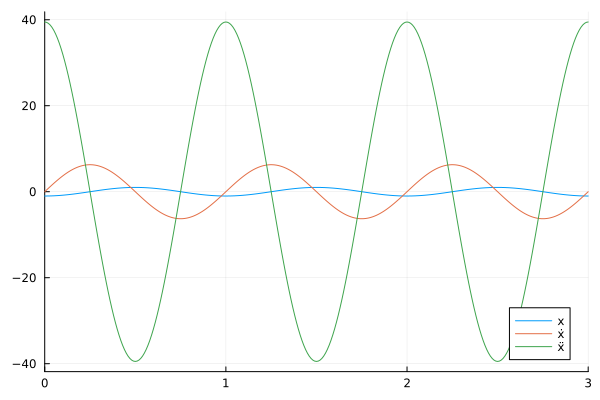

In [9]:
plot(t,dof_position.(k.(t)),xlims=(0,Inf),label="x")
plot!(t,dof_velocity.(k.(t)),label="ẋ")
plot!(t,dof_acceleration.(k.(t)),label="ẍ")

### Smooth ramp motion
To ramp the position from one value to another, we use the `SmoothRampDOF`.
For this, we need to specify the nominal velocity of the ramp,
the change in position, and the time at which the ramp starts.
There is an optional argument `ramp` to control the ramp's smoothness.
It defaults to `EldredgeRamp(11.0)`, an Eldredge-type ramp with smoothness
factor 11.

In [10]:
vel = 1.0  ## nominal ramp velocity
Δx = 1.0 ## change in position
t0 = 1.0 ## time of ramp start
k = SmoothRampDOF(vel,Δx,t0)

Smooth position ramp kinematics (nominal rate = 1.0, amplitude = 1.0, nominal time = 1.0)

Plot the position

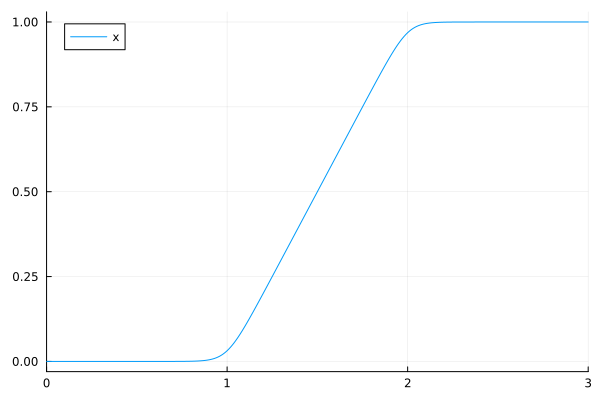

In [11]:
plot(t,dof_position.(k.(t)),xlims=(0,Inf),label="x")

### User-defined motion
The user can specify the time-varying position by supplying a function of time
and using `CustomDOF`. It automatically differentiates this function to
get velocity and acceleration.
For example, a quadratic behavior

In [12]:
f(t) = 1.0*t + 2.0*t^2
k = CustomDOF(f)

Custom kinematics

Plot the position

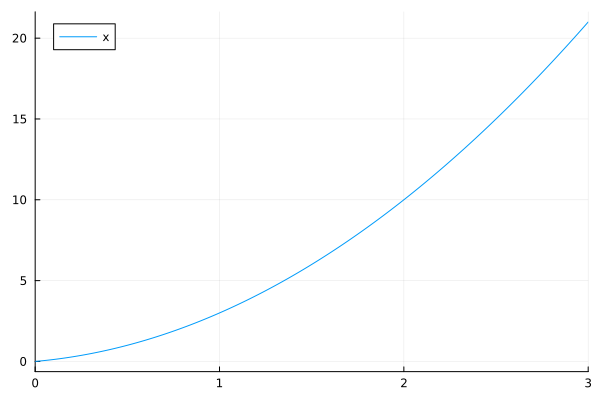

In [13]:
plot(t,dof_position.(k.(t)),xlims=(0,Inf),label="x")

and the velocity

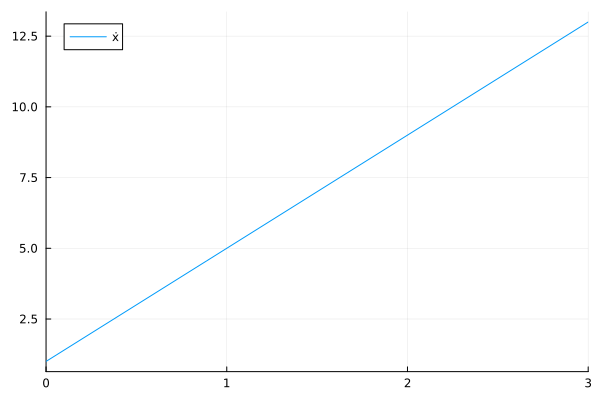

In [14]:
plot(t,dof_velocity.(k.(t)),xlims=(0,Inf),label="ẋ")

and the acceleration

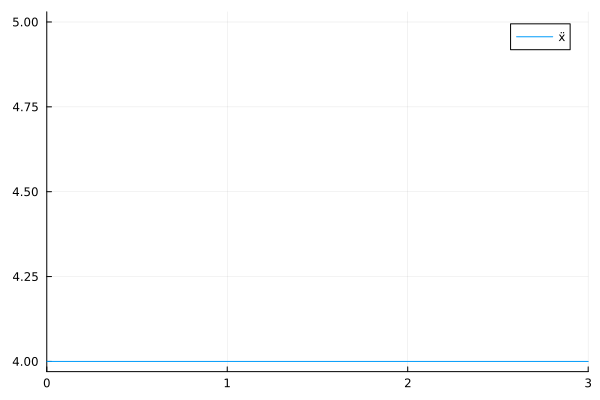

In [15]:
plot(t,dof_acceleration.(k.(t)),xlims=(0,Inf),label="ẍ")

## Exogenous and unconstrained behaviors
If the degree of freedom is to be *exogenous* or *unconstrained*,
then it can be designated as such, e.g,

In [16]:
k = ExogenousDOF

ExogenousDOF

or

In [17]:
k = UnconstrainedDOF

UnconstrainedDOF

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*